# In this notebook, we're going to take our json data tables and do some linear fittings

In [2]:
# helps with debugging in VSCode
%colors nocolor

In [3]:
import os
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
import seaborn as sns

try:
    from synoracle import sequence, ingredients
except ModuleNotFoundError:
    module_path = os.path.abspath(os.path.join('..'))
    if module_path not in sys.path:
        sys.path.append(module_path)
    from synoracle import ingredients

from tqdm.notebook import tqdm, trange

def li_iterate(li):
    l = iter(li)
    for _ in trange(len(li)):
        yield next(l)

In [4]:
with open("./all_filtered_times.json", 'r', encoding='utf-8') as f:
    rawdata = json.loads(f.read())

with open("./sequences.json", 'r', encoding='utf-8') as f:
    rawdata = json.loads(f.read())

In [5]:
all_filtered_temps = pd.read_json('all_filtered_temps.json')
all_filtered_temps.head()

,step number,step type,synthesis_number,T (K)
0,11,remove,0,353.15
1,0,other,0,1073.15
2,7,other,0,298.15
3,11,remove,1,973.15
4,20,remove,2,313.15


In [6]:
all_filtered_times = pd.read_json('all_filtered_times.json')
all_filtered_times.head()

,step number,step type,synthesis_number,Time (min)
0,0,other,0,120.0
1,7,other,0,1440.0
2,4,add,1,10.0
3,11,remove,1,120.0
4,5,other,1,1440.0


c:\Users\d23895jm\Anaconda3\envs\SynOracle\lib\site-packages\ipykernel_launcher.py:42: UserWarning: FixedFormatter should only be used together with FixedLocator


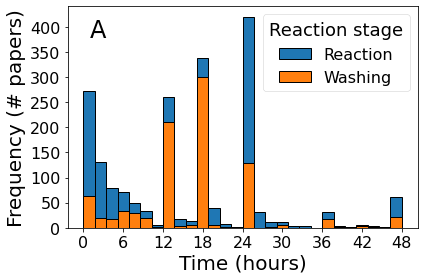

In [9]:
import seaborn as sns

fig, ax = plt.subplots()
bins = np.linspace(0,48,29)
grouped_times = all_filtered_times.groupby(['step type', 'synthesis_number']).aggregate({'Time (min)': sum}).reset_index()

data1=grouped_times[
    (grouped_times['Time (min)']>0) & 
    (grouped_times['step type']=='other') & 
    (grouped_times['Time (min)']<5000)
    ]['Time (min)']/60
# data1.plot.hist(bins=bins, ax=ax)
data2=grouped_times[
    (grouped_times['Time (min)']>0) & 
    (grouped_times['step type']=='remove') & 
    (grouped_times['Time (min)']<5000)
    ]['Time (min)']/60
# data2.plot.hist(bins=bins, ax=ax)

data3 = pd.concat({'react': data1, 'remove': data2}).reset_index().rename({'level_0': 'Stage'}, axis=1)
sns.histplot(
    data=data3,
    x = 'Time (min)',
    bins=bins,
    hue = 'Stage',
    ax=ax,
    multiple='stack',
    hue_order = ['react', 'remove'],
    edgecolor='k',
    linewidth=1,
    alpha=1
    )

legend = ax.get_legend()
handles = legend.legendHandles

legend.remove()
ax.legend(handles, ['Reaction', 'Washing'],fontsize=16, title = 'Reaction stage', title_fontsize=18)

ax.set_xticks([0,6,12,18,24,30,36,42,48])
ax.set_xticklabels([0,6,12,18,24,30,36,42,48], fontsize=16)
ax.set_yticklabels([int(x) for x in ax.get_yticks()], fontsize=16)

ax.annotate('A', (1, 380), fontsize=24)
ax.set_ylabel('Frequency (# papers)', fontsize=20)
ax.set_xlabel('Time (hours)', fontsize=20)

plt.tight_layout()
plt.savefig('Fig 6a.png', dpi=900)

[  0.  10.  20.  30.  40.  50.  60.  70.  80.  90. 100. 110. 120. 130.
 140. 150. 160. 170. 180. 190. 200.]


c:\Users\d23895jm\Anaconda3\envs\SynOracle\lib\site-packages\ipykernel_launcher.py:37: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\Users\d23895jm\Anaconda3\envs\SynOracle\lib\site-packages\ipykernel_launcher.py:38: UserWarning: FixedFormatter should only be used together with FixedLocator


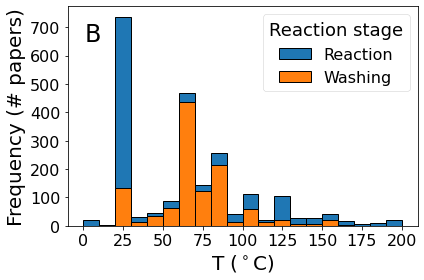

In [10]:
fig, ax = plt.subplots()
bins = np.linspace(0,200,21)
print(bins)
data1=all_filtered_temps[
    (all_filtered_temps['T (K)']>0) & 
    (all_filtered_temps['step type']=='other') 
    ]['T (K)']
# data1.plot.hist(bins=bins, ax=ax, alpha=0.5)
data2=all_filtered_temps[
    (all_filtered_temps['T (K)']>0) & 
    (all_filtered_temps['step type']=='remove')
            ]['T (K)']
# data2.plot.hist(bins=bins, ax=ax, alpha=0.5)
data3 = pd.concat({'react': data1, 'remove': data2}).reset_index().rename({'level_0': 'Stage'}, axis=1)
data3['T (K)'] = data3['T (K)']-273.15
data3
sns.set_context(rc = {'patch.linewidth': 0.6})
sns.histplot(
    data=data3,
    x = 'T (K)',
    bins=bins,
    hue = 'Stage',
    ax=ax,
    multiple='stack', 
    hue_order = ['react', 'remove'],
    edgecolor='k',
    linewidth=1,
    alpha=1
)

legend = ax.get_legend()
handles = legend.legendHandles

legend.remove()
ax.legend(handles, ['Reaction', 'Washing'],fontsize=16, title = 'Reaction stage', title_fontsize=18)

ax.set_yticklabels([int(x) for x in ax.get_yticks()], fontsize=16)
ax.set_xticklabels([int(x) for x in ax.get_xticks()], fontsize=16)
ax.annotate('B', (1, 650), fontsize=24)
ax.set_ylabel('Frequency (# papers)', fontsize=20)
ax.set_xlabel('T ($^\circ$C)', fontsize=20)

plt.tight_layout()
plt.savefig('Fig 6b.png', dpi=900)